#### Installing Necessary libraries and modules

In [ ]:
!pip install pandas numpy matplotlib seaborn wordcloud textblob scikit-learn vaderSentiment 

#### Importing Required Libraries

In [36]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

#### Define Parameters

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20 ## Number of pages to scrape
page_size = 100 ## Number of reviews per page

#### Initializing empty lists for storing data

In [3]:
reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

#### Scraping the data

In [4]:
for i in range(1, pages + 1):
    rating = []
    category = []
    print(f"Scraping page {i}")
    
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)

        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())

        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = pd.concat([df, data_dict], ignore_index=True)
        #print(df)
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [5]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
58,NaN,Solo Leisure,Economy Class,Edinburgh to Delhi via London,September 2024,1.0,1.0,1.0,NaN,1.0,NaN,1,no,✅ Trip Verified | British Airways Flight fro...
980,NaN,Solo Leisure,Business Class,Glasgow to London,September 2019,4.0,5.0,5.0,NaN,5.0,NaN,5,yes,✅ Trip Verified | Glasgow to London. Smooth fl...
1027,NaN,Solo Leisure,Economy Class,Inverness to Vancouver via London,August 2019,2.0,2.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | A supremely awful experience...
1705,Boeing 777-200ER,Business,Economy Class,London to Sao Paulo,August 2017,2.0,4.0,2.0,4.0,5.0,NaN,4,yes,✅ Verified Review | London to Sao Paulo. An e...
272,NaN,Family Leisure,Economy Class,London to Los Angeles,July 2023,NaN,NaN,NaN,NaN,NaN,NaN,1,no,Not Verified | We will never fly British Airw...


In [6]:
df.shape

(2000, 14)

In [7]:
print(len(df)) #2000 Datapoints scraped

2000


#### Saving it to a new comma separated values (.csv) file for convenience

In [8]:
df.to_csv("british_airways_reviews.csv", index=False)

#### Reading saved file

In [2]:
df = pd.read_csv('british_airways_reviews.csv')

In [3]:
df.columns

Index(['Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown',
       'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages',
       'Inflight Entertainment', 'Ground Service', 'Wifi & Connectivity',
       'Value For Money', 'Recommended', 'reviews'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1182 non-null   object 
 1   Type Of Traveller       1998 non-null   object 
 2   Seat Type               2000 non-null   object 
 3   Route                   1996 non-null   object 
 4   Date Flown              2000 non-null   object 
 5   Seat Comfort            1886 non-null   float64
 6   Cabin Staff Service     1871 non-null   float64
 7   Food & Beverages        1614 non-null   float64
 8   Inflight Entertainment  1115 non-null   float64
 9   Ground Service          1932 non-null   float64
 10  Wifi & Connectivity     514 non-null    float64
 11  Value For Money         2000 non-null   int64  
 12  Recommended             2000 non-null   object 
 13  reviews                 2000 non-null   object 
dtypes: float64(6), int64(1), object(7)
memor

#### Data Preprocessing and EDA 

In [5]:
display(df.head())

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes,✅ Trip Verified | Flight mainly let down by ...
1,NaN,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | Another awful experience b...
2,NaN,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no,"✅ Trip Verified | The service was rude, full..."
3,NaN,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no,✅ Trip Verified | This flight was a joke. Th...
4,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes,✅ Trip Verified | This time British Airways ...


#### Checking for Missing Values

In [6]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Aircraft                   818
Type Of Traveller            2
Seat Type                    0
Route                        4
Date Flown                   0
Seat Comfort               114
Cabin Staff Service        129
Food & Beverages           386
Inflight Entertainment     885
Ground Service              68
Wifi & Connectivity       1486
Value For Money              0
Recommended                  0
reviews                      0
dtype: int64


#### filling the missing values in the Aircraft column using the last known non-null value

In [7]:
df['Aircraft'] = df['Aircraft'].fillna(method='ffill')

In [8]:
df.head(20)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 787,Solo Leisure,Business Class,Cape Town to London,March 2025,5.0,2.0,5.0,5.0,4.0,1.0,4,yes,✅ Trip Verified | Flight mainly let down by ...
1,Boeing 787,Business,Business Class,London to Geneva,December 2024,1.0,1.0,NaN,NaN,1.0,NaN,1,no,✅ Trip Verified | Another awful experience b...
2,Boeing 787,Business,Premium Economy,London to New York,January 2025,1.0,1.0,1.0,NaN,5.0,NaN,1,no,"✅ Trip Verified | The service was rude, full..."
3,Boeing 787,Business,Business Class,Chambery to London,January 2025,1.0,1.0,2.0,NaN,1.0,NaN,1,no,✅ Trip Verified | This flight was a joke. Th...
4,Boeing 777,Business,Premium Economy,Gatwick to Antigua,March 2025,5.0,5.0,4.0,4.0,5.0,4.0,5,yes,✅ Trip Verified | This time British Airways ...
5,Boeing 777,Couple Leisure,Premium Economy,Mumbai to London,February 2025,5.0,4.0,3.0,5.0,4.0,NaN,5,yes,"✅ Trip Verified | The seats were excellent, ..."
6,A350,Couple Leisure,Business Class,Nairobi to London,February 2025,4.0,1.0,2.0,3.0,4.0,NaN,3,no,✅ Trip Verified | After the nightmare of get...
7,A320,Solo Leisure,Economy Class,London Gatwick to Marrakech,February 2025,4.0,1.0,NaN,NaN,2.0,NaN,2,no,✅ Trip Verified | Prior to boarding a gate a...
8,A320,Business,Premium Economy,Amsterdam to Las Vegas via London,November 2024,3.0,3.0,3.0,3.0,1.0,NaN,1,no,✅ Trip Verified | I flew from Amsterdam to L...
9,A350-1000,Couple Leisure,Business Class,London to Nairobi,February 2025,4.0,1.0,2.0,NaN,3.0,NaN,3,no,"✅ Trip Verified | First the good news, the clu..."


In [9]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Aircraft                     0
Type Of Traveller            2
Seat Type                    0
Route                        4
Date Flown                   0
Seat Comfort               114
Cabin Staff Service        129
Food & Beverages           386
Inflight Entertainment     885
Ground Service              68
Wifi & Connectivity       1486
Value For Money              0
Recommended                  0
reviews                      0
dtype: int64


#### Except for the 'Aircraft' and 'Reviews' columns, the remaining columns can be left untreated as they are not directly relevant to sentiment analysis.

#### Checking for Duplicates (if any)

In [10]:
df[df.duplicated()]

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews


In [11]:
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


#### Text Cleaning Function

In [12]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

#### Apply cleaning function to reviews

In [13]:
df['Cleaned Review'] = df['reviews'].astype(str).apply(clean_text)

#### Sentiment Analysis using TextBlob

In [14]:
def get_textblob_sentiment(text):
    sentiment_score = TextBlob(text).sentiment.polarity
    if sentiment_score > 0:
        return "Positive"
    elif sentiment_score < 0:
        return "Negative"
    else:
        return "Neutral"

In [15]:
df['TextBlob Sentiment'] = df['Cleaned Review'].apply(get_textblob_sentiment)

#### VADER Sentiment Analysis

In [16]:
analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

In [17]:
df['VADER Sentiment'] = df['Cleaned Review'].apply(get_vader_sentiment)

#### Display Processed Data with Sentiment Labels

In [18]:
display(df[['reviews', 'Cleaned Review', 'TextBlob Sentiment', 'VADER Sentiment']].head(10))

,reviews,Cleaned Review,TextBlob Sentiment,VADER Sentiment
0,✅ Trip Verified | Flight mainly let down by ...,trip verified flight mainly let down by a disa...,Positive,Negative
1,✅ Trip Verified | Another awful experience b...,trip verified another awful experience by brit...,Negative,Negative
2,"✅ Trip Verified | The service was rude, full...",trip verified the service was rude full of att...,Negative,Negative
3,✅ Trip Verified | This flight was a joke. Th...,trip verified this flight was a joke there was...,Negative,Neutral
4,✅ Trip Verified | This time British Airways ...,trip verified this time british airways manage...,Positive,Positive
5,"✅ Trip Verified | The seats were excellent, ...",trip verified the seats were excellent with a ...,Positive,Positive
6,✅ Trip Verified | After the nightmare of get...,trip verified after the nightmare of getting t...,Positive,Positive
7,✅ Trip Verified | Prior to boarding a gate a...,trip verified prior to boarding a gate agent s...,Negative,Negative
8,✅ Trip Verified | I flew from Amsterdam to L...,trip verified i flew from amsterdam to las veg...,Positive,Negative
9,"✅ Trip Verified | First the good news, the clu...",trip verified first the good news the club sui...,Positive,Positive


#### Visualizing Sentiment Distribution

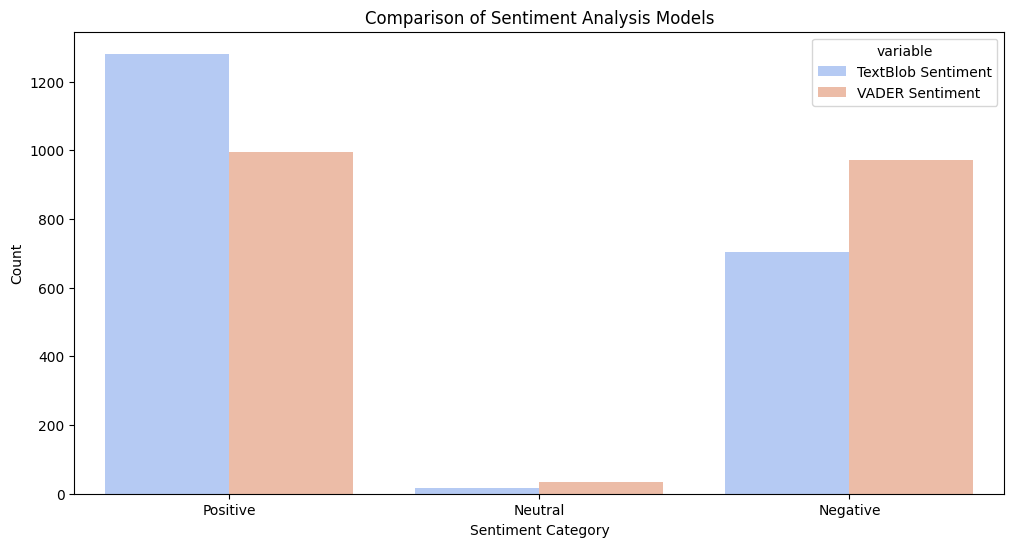

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=df.melt(id_vars=['Cleaned Review'], value_vars=['TextBlob Sentiment', 'VADER Sentiment']), 
              x='value', hue='variable', palette='coolwarm', order=["Positive", "Neutral", "Negative"])
plt.title("Comparison of Sentiment Analysis Models")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

#### WordCloud of Positive and Negative Reviews

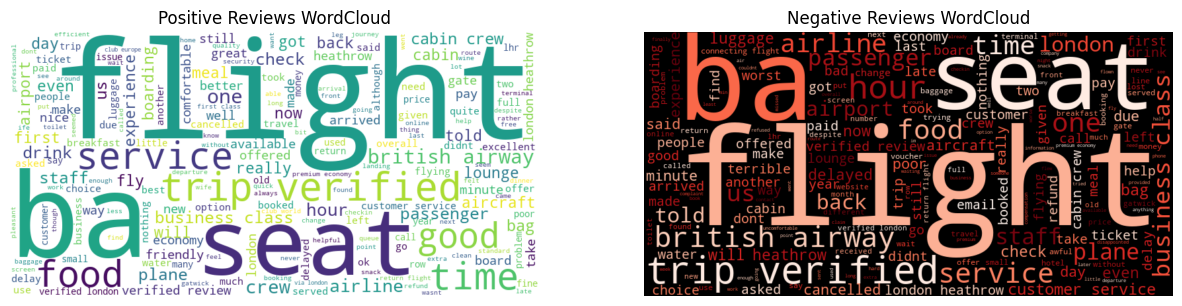

In [20]:
positive_text = ' '.join(df[df['TextBlob Sentiment'] == 'Positive']['Cleaned Review'])
negative_text = ' '.join(df[df['TextBlob Sentiment'] == 'Negative']['Cleaned Review'])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
ax[0].imshow(wordcloud_positive, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Positive Reviews WordCloud")

wordcloud_negative = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
ax[1].imshow(wordcloud_negative, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Negative Reviews WordCloud")

plt.show()

#### Visulizing Most Common Words in Reviews

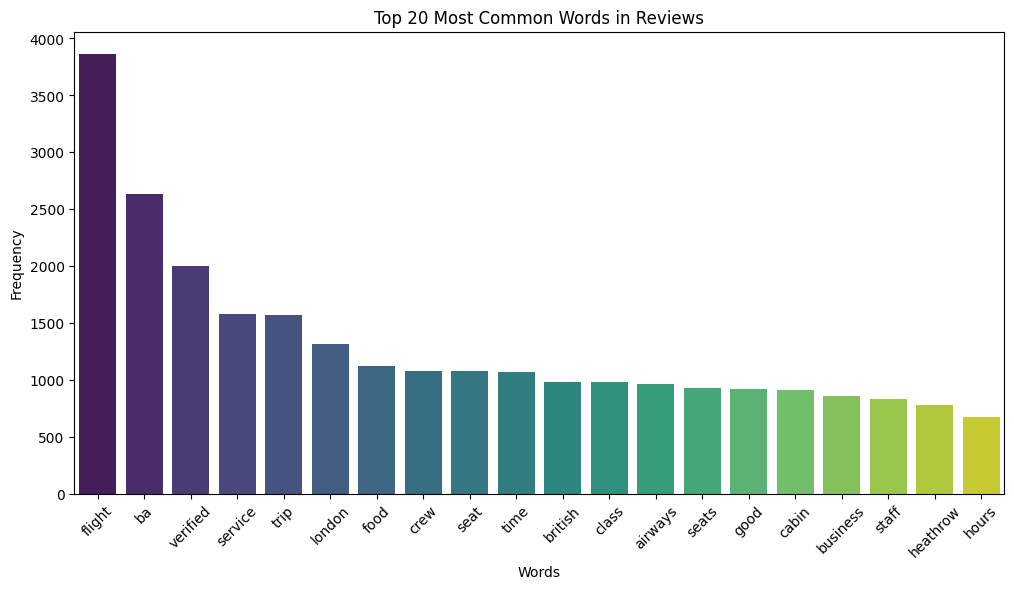

In [21]:
vectorizer = CountVectorizer(stop_words='english')
word_counts = vectorizer.fit_transform(df['Cleaned Review'])
word_sum = np.asarray(word_counts.sum(axis=0)).flatten()
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_sum))

common_words = Counter(word_freq).most_common(20)
words, counts = zip(*common_words)
plt.figure(figsize=(12,6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 20 Most Common Words in Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

#### Topic Modeling with LDA

In [22]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
doc_term_matrix = vectorizer_tfidf.fit_transform(df['Cleaned Review'])
lda_model = LatentDirichletAllocation(n_components=7, random_state=42)
topics = lda_model.fit_transform(doc_term_matrix)

#### Display top words for each topic

In [23]:
words = vectorizer_tfidf.get_feature_names_out()
topic_words = {}
for topic_idx, topic in enumerate(lda_model.components_):
    topic_words[f"Topic {topic_idx+1}"] = [words[i] for i in topic.argsort()[:-10 - 1:-1]]

#### Convert Topic data to DataFrame

In [24]:
topic_df = pd.DataFrame.from_dict(topic_words, orient='index', columns=[f'Word {i+1}' for i in range(10)])
display(topic_df)

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10
Topic 1,vegan,unique,favorite,owe,packs,court,mrs,bothering,pakistan,blanked
Topic 2,flight,ba,service,trip,verified,london,food,seat,crew,class
Topic 3,doha,cdg,birthday,surly,interaction,reclining,yang,performance,faro,leeds
Topic 4,keflavik,wt,fitted,bottled,gothenburg,aegean,qr,spinach,grounded,leadership
Topic 5,charges,baby,budapest,double,usa,ontime,causing,filed,travelers,loss
Topic 6,refunding,nassau,reykjavik,sugar,buggy,oman,amazingly,superbly,console,movement
Topic 7,congestion,eurowings,titan,amman,unremarkable,fliers,perception,herded,houston,grandfather


#### Visualizing Bar Chart for Top Words in Each Topic

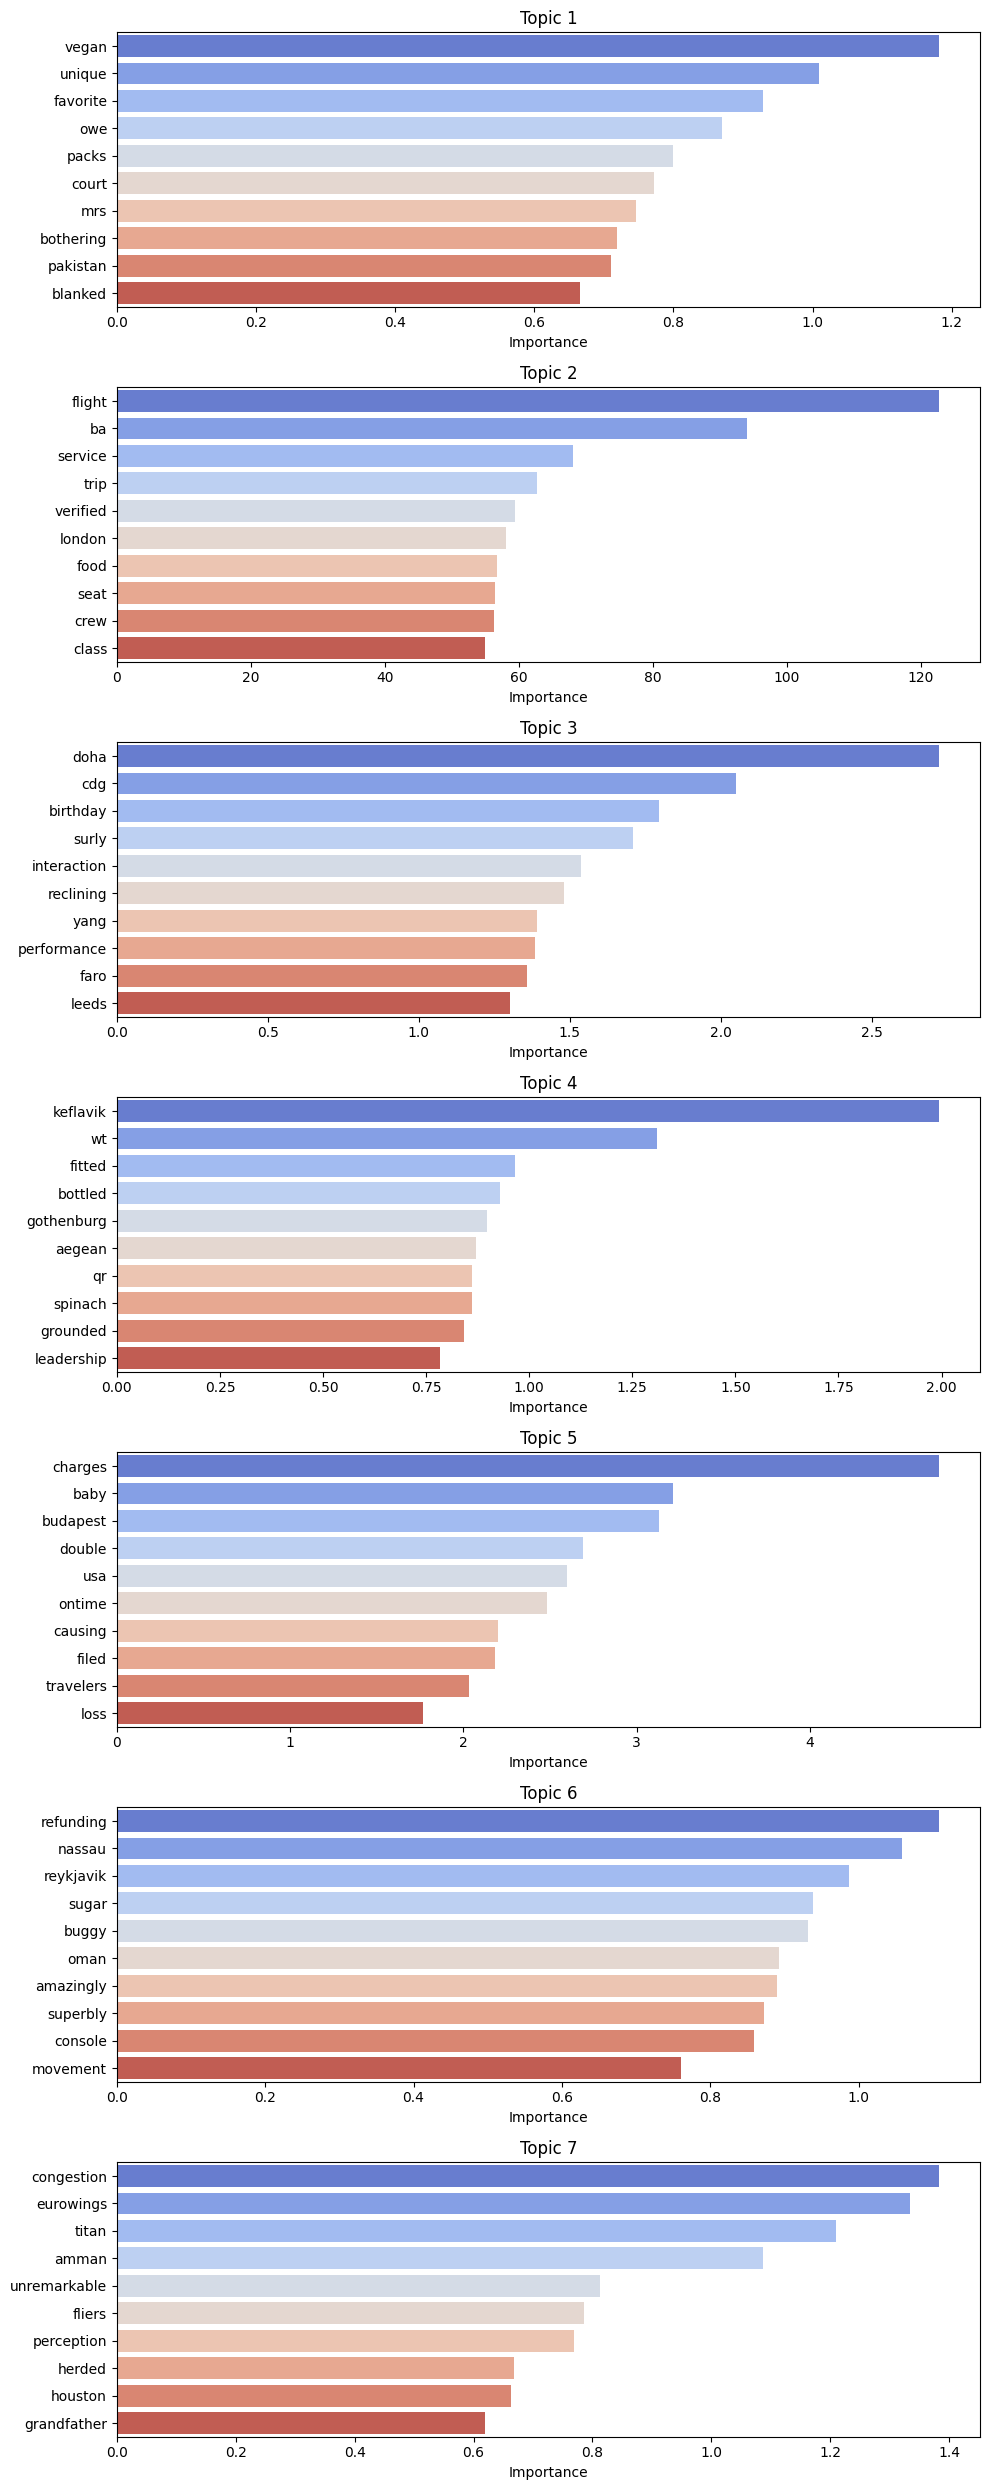

In [25]:
num_top_words = 10
topics_dict = {f"Topic {i+1}": [words[idx] for idx in topic.argsort()[:-num_top_words - 1:-1]] 
               for i, topic in enumerate(lda_model.components_)}

fig, axes = plt.subplots(7, 1, figsize=(10, 25))  # Adjust number of subplots based on topics
for i, (topic, word_list) in enumerate(topics_dict.items()):
    word_counts = [lda_model.components_[i][words.tolist().index(word)] for word in word_list]
    sns.barplot(x=word_counts, y=word_list, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{topic}")
    axes[i].set_xlabel("Importance")

plt.tight_layout()
plt.show()

#### Word Clouds for Topics

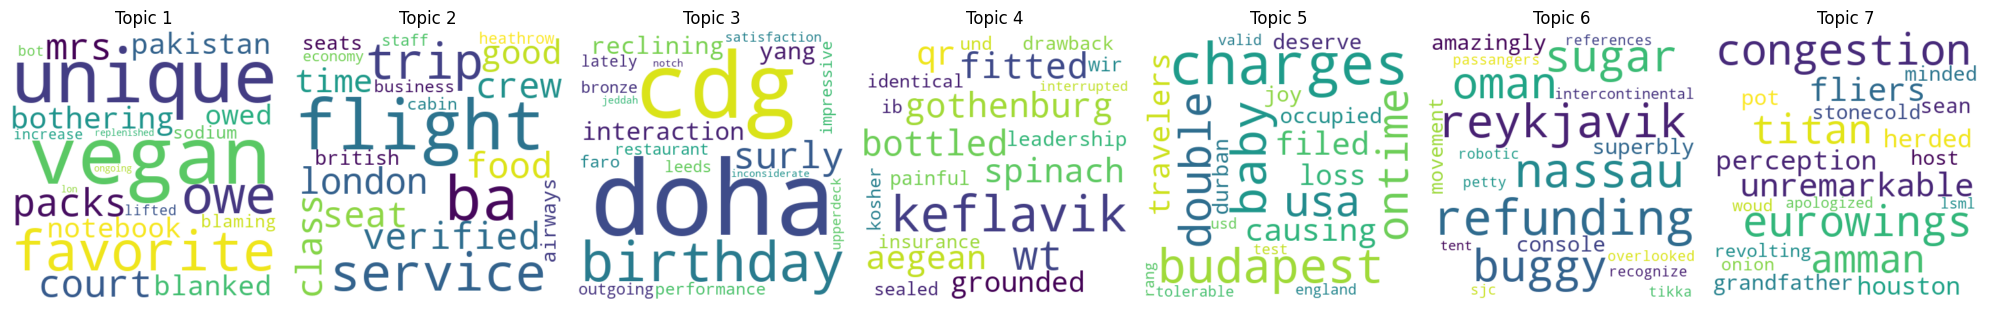

In [35]:
def plot_word_clouds(lda_model, feature_names, num_topics=7):
    topics = lda_model.components_
    fig, axes = plt.subplots(1, num_topics, figsize=(20, 10))
    
    for topic_idx, topic in enumerate(topics):
        word_freq = {feature_names[i]: topic[i] for i in topic.argsort()[-20:]}
        wordcloud = WordCloud(width=400, height=400, background_color='white').generate_from_frequencies(word_freq)
        
        axes[topic_idx].imshow(wordcloud, interpolation='bilinear')
        axes[topic_idx].axis("off")
        axes[topic_idx].set_title(f"Topic {topic_idx+1}")
    
    plt.tight_layout()
    plt.show()

plot_word_clouds(lda_model, words)

---